# TASK-1: GRIP MAY21 THE SPARK FOUNDATION

# Author: Pandhigunta Surya Kumar
Data Science & Business Analytics intern at The Sparks Foundation

# Prediction using Supervised ML

In [1]:
# Importing all required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn

In [2]:
# Reading the data from the given Url link
url="http://bit.ly/w-data"
data=pd.read_csv(url)
print("Data imported successfully")

Data imported successfully


In [26]:
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
# check first five observations
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
# check last five observations
data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [5]:
# check shape of the given data set
data.shape

(25, 2)

In [6]:
# check the information of the given data 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [7]:
# check the type of data
type(data)

pandas.core.frame.DataFrame

In [8]:
# check the columns name
data.columns

Index(['Hours', 'Scores'], dtype='object')

# Descriptive statistics and Correlation 

In [9]:
# check basic statistical infromation given data
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [10]:
corr = data.corr()
print('Pearsons Correlation:', corr)

Pearsons Correlation:            Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [11]:
x=pd.Series(data.Hours)
y=pd.Series(data.Scores)

In [12]:
# Pearson's correlation coefficient and test of significance r 

import scipy.stats
scipy.stats.pearsonr(x,y)   

(0.9761906560220884, 9.132624467460325e-17)

# Data Visualization

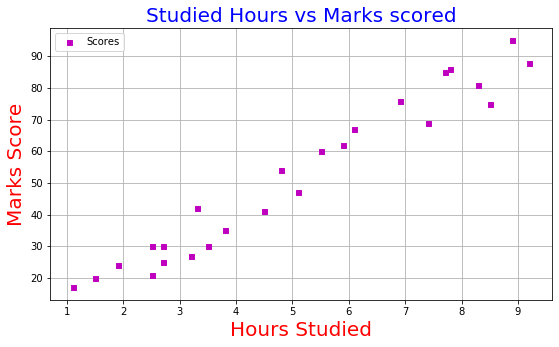

In [13]:
# Plotting the distribution of scores

data.plot(x='Hours', y='Scores', style='ms', figsize=(9,5), markersize=5)  
plt.grid()
plt.title('Studied Hours vs Marks scored', size=20, c="b")  
plt.xlabel('Hours Studied', size=20, c='red')  
plt.ylabel('Marks Score', size=20, c='red')  
plt.show()

# Preparing the data
The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [14]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values 

In [15]:
# Import train_test_split method and apply the method

from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

# Training the Algorithm
We have split our data into training and testing sets, and now is finally the time to train our algorithm.

In [16]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


In [24]:
print(regressor.intercept_)
print(regressor.coef_)

2.018160041434683
[9.91065648]


In [17]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_
print(line)

[[26.79480124]
 [52.56250809]
 [33.73226078]
 [86.25874013]
 [36.70545772]
 [16.88414476]
 [93.19619966]
 [56.52677068]
 [84.27660883]
 [28.77693254]
 [78.33021494]
 [60.49103328]
 [46.6161142 ]
 [34.72332643]
 [12.91988217]
 [90.22300272]
 [26.79480124]
 [20.84840735]
 [62.47316457]
 [75.357018  ]
 [28.77693254]
 [49.58931115]
 [39.67865467]
 [70.40168976]
 [79.32128059]]


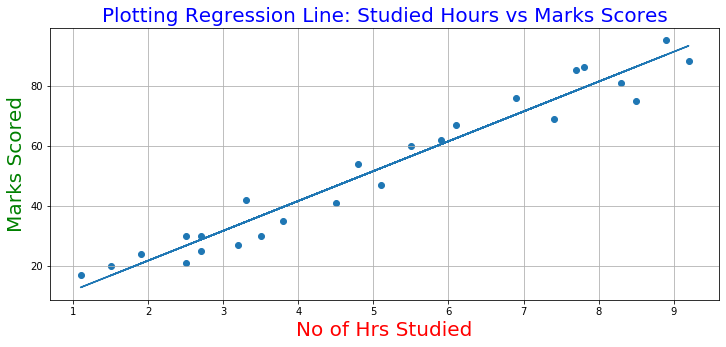

In [18]:
# Plotting for the test data
plt.figure(figsize=(12,5))
plt.scatter(X, y)
plt.grid()
plt.plot(X, line)
plt.title("Plotting Regression Line: Studied Hours vs Marks Scores", size=20,c="b")
plt.xlabel("No of Hrs Studied",c='red',size=20)
plt.ylabel("Marks Scored",c='green',size=20)
plt.show()

# Making Predictions
Now that we have trained our algorithm, it's time to make some predictions.

In [19]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [20]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual_Scores': y_test, 'Predicted_Scores': y_pred})  
df

,Actual_Scores,Predicted_Scores
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


# Graphical presentation of ActualScores vs Predicted scores

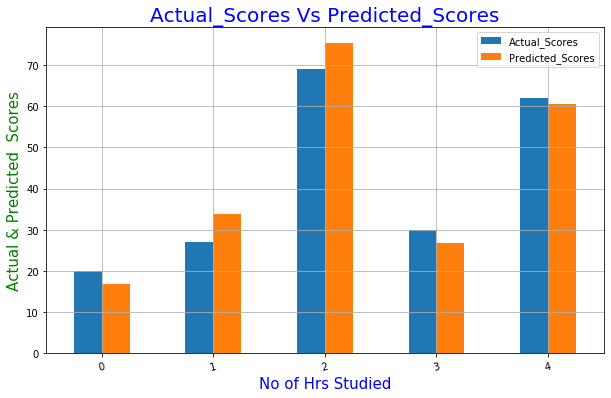

In [21]:
df.plot.bar(rot=15,figsize=(10,6))
plt.grid()
plt.title("Actual_Scores Vs Predicted_Scores", c='b', size=20)
plt.xlabel("No of Hrs Studied", c='b',size=15)
plt.ylabel("Actual & Predicted  Scores",c='green',size=15)
plt.show()

Score prediction: if studied hrs 9.25 what is the predicted score

In [22]:
hour=np.array([[9.25]])
our_prediction=regressor.predict(hour)
print("No of Studied Hours:", hour)
print("predicted Score:", our_prediction)

No of Studied Hours: [[9.25]]
predicted Score: [93.69173249]


# Evaluating the model
The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [23]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975


                     ***********Thankyou**************